In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical 
import time

In [2]:
# loading training & test data from current directory
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
test.shape

(28000, 784)

In [5]:
y = train['label']

In [6]:
y = to_categorical(y, num_classes=10)

In [7]:
y.shape

(42000, 10)

In [8]:
train = train.iloc[:, 1:].values.reshape(-1, 28, 28, 1)

In [9]:
train.shape

(42000, 28, 28, 1)

In [10]:
test = test.iloc[:,:].values.reshape(-1,28,28,1)

In [11]:
test.shape

(28000, 28, 28, 1)

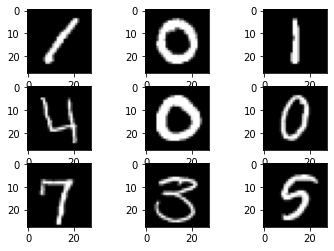

In [12]:
for i in range(9):
    plt.subplot(3, 3, 1+i)
    plt.imshow(train[i], cmap=plt.get_cmap('gray'))

In [13]:
# rescale training & test data value in between 0 and 1
train = train.reshape((train.shape[0], 28*28)).astype('float64') / 255

In [14]:
train.shape

(42000, 784)

In [15]:
test = test.reshape((test.shape[0], 28*28)).astype('float64') / 255

In [16]:
test.shape

(28000, 784)

In [17]:
# split training data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train, y, test_size=0.1, random_state=42)

In [18]:
# build model
from tensorflow.keras import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
import tensorflow as tf

In [19]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [21]:
# training
optimizer = tf.keras.optimizers.Adam(0.001)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>

In [24]:
start = time.time()
history = model.fit(x_train, y_train, epochs=40, batch_size=64, validation_data = (x_val, y_val))
end = time.time()
print("Algorithm time is {} s:".format(round(end - start)))

Epoch 1/40
591/591 [==============================] - 5s 6ms/step - loss: 0.3380 - accuracy: 0.8984 - val_loss: 0.1595 - val_accuracy: 0.9495
Epoch 2/40
591/591 [==============================] - 3s 5ms/step - loss: 0.1631 - accuracy: 0.9516 - val_loss: 0.1243 - val_accuracy: 0.9633
Epoch 3/40
591/591 [==============================] - 3s 5ms/step - loss: 0.1245 - accuracy: 0.9616 - val_loss: 0.1090 - val_accuracy: 0.9679
Epoch 4/40
591/591 [==============================] - 3s 6ms/step - loss: 0.1019 - accuracy: 0.9683 - val_loss: 0.0965 - val_accuracy: 0.9714
Epoch 5/40
591/591 [==============================] - 3s 5ms/step - loss: 0.0891 - accuracy: 0.9713 - val_loss: 0.0947 - val_accuracy: 0.9690
Epoch 6/40
591/591 [==============================] - 3s 5ms/step - loss: 0.0818 - accuracy: 0.9734 - val_loss: 0.0826 - val_accuracy: 0.9733
Epoch 7/40
591/591 [==============================] - 3s 5ms/step - loss: 0.0733 - accuracy: 0.9769 - val_loss: 0.0821 - val_accuracy: 0.9740
Epoch 

In [25]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

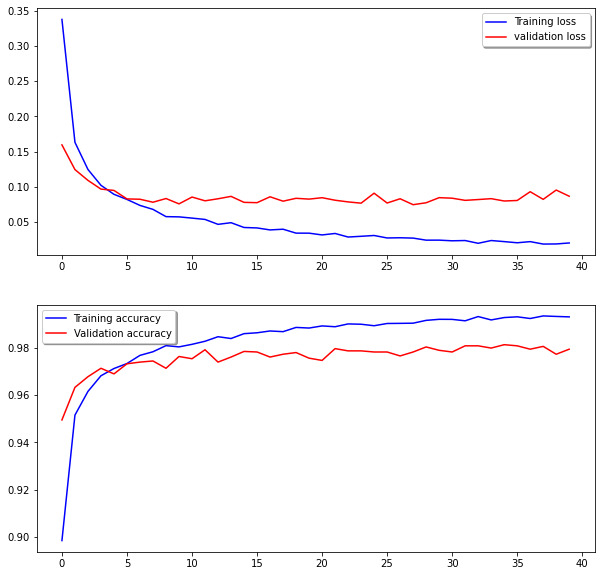

In [26]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Training loss')
ax[0].plot(history.history['val_loss'], color='r', label='validation loss', axes=ax[0])
ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
ax[1].legend(loc='best', shadow=True)

In [27]:
# prediction of test data
predictions = model.predict(test)
predictions = np.argmax(predictions, axis=1)

In [28]:
# load more data to re-train the model
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
(x_train_1, y_train_1), (x_val_1, y_val_1) = mnist.load_data()

In [29]:
print('Train: X=%s, y=%s' %(x_train_1.shape, y_train_1.shape))
print('Test: X=%s, y=%s' %(x_val_1.shape, y_val_1.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [30]:
x_train_1 = x_train_1.reshape((x_train_1.shape[0], 28*28)).astype('float64') / 255

In [31]:
x_val_1 = x_val_1.reshape((x_val_1.shape[0], 28*28)).astype('float64') / 255

In [32]:
y_train_1 = to_categorical(y_train_1)

In [33]:
y_val_1 = to_categorical(y_val_1)

In [34]:
import numpy as np
new_x_train = np.concatenate((x_train_1, x_val_1), axis=0)
new_y_train = np.concatenate((y_train_1, y_val_1), axis=0)

In [35]:
new_x_train.shape

(70000, 784)

In [36]:
new_y_train.shape

(70000, 10)

In [37]:
optimizer = tf.keras.optimizers.Adam(0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [39]:
optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>

In [40]:
start = time.time()
history = model.fit(new_x_train, new_y_train, epochs=60, batch_size=64, validation_data=(train, y))
end = time.time()
print("Algorithm time is {} s:".format(round(end-start)))

Epoch 1/60
1094/1094 [==============================] - 13s 10ms/step - loss: 0.0623 - accuracy: 0.9845 - val_loss: 0.0053 - val_accuracy: 0.9988
Epoch 2/60
1094/1094 [==============================] - 7s 6ms/step - loss: 0.0450 - accuracy: 0.9868 - val_loss: 0.0043 - val_accuracy: 0.9989
Epoch 3/60
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0402 - accuracy: 0.9881 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 4/60
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 5/60
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 6/60
1094/1094 [==============================] - 7s 6ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 7/60
1094/1094 [==============================] - 7s 6ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0022 - val_accurac

In [41]:
# the above performace is good. Using trained model to predict test data set
predictions = model.predict(test)

In [42]:
predictions = np.argmax(predictions, axis=1)

In [44]:
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [45]:
# copy the test result into 'sample_submission.csv' in order to submit result to Kaggle
submission = pd.read_csv('sample_submission.csv')

In [47]:
submission['Label'] = predictions

In [48]:
submission.to_csv('submission.csv', index=False)